In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report
from IPython.display import display_html
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, KFold,GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, TunedThresholdClassifierCV, cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib.colors import ListedColormap
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss

from sklearn.metrics import fbeta_score
from IPython.display import display

In [7]:
path_train = 'train.csv'
y_train = 'train_Y.csv'
df0 = pd.read_csv(path_train)
df1 = pd.read_csv(y_train)
df0.info()
df = pd.concat([df0, df1], axis=1)
df.info()
df = df.drop_duplicates()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,1.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0,0.0
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0,1.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0,0.0


In [9]:
feat = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income', 'Education']

In [11]:
y = np.array(df.Diabetes_binary)
X = df.drop(columns=['Diabetes_binary'])
X_train,X_test,y_train,y_test = train_test_split(X, y) 

In [13]:
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Education', 'Income']
binar = [
    'HighBP',
    'HighChol',
    'CholCheck',  
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'DiffWalk',
    'Sex'
]
num = Pipeline(steps=[
    ('missing_num', KNNImputer()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), 
#    ('bin', KBinsDiscretizer(n_bins = 3, strategy = 'uniform', encode = 'onehot-dense')),
    ('scaler', MinMaxScaler())]) #StandardScaler()RobustScaler
bin = Pipeline(steps=[
    ('imputer', KNNImputer()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)) 
])

CT = ColumnTransformer([
    ("num", num, numeric_features),
    ("bin", bin, binar)
    ], force_int_remainder_cols=False, remainder='passthrough').set_output(transform='pandas')
display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('missing_num', KNNImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth', 'Age',
                                  'GenHlth', 'Education', 'Income']),
                                ('bin',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False,
                                                                     interaction_only=True))]),
                                 ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                                  'Stroke', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'DiffWalk', 'Sex'])])

,35687,30465,35104,20076,13941
num__BMI,0.282353,0.129412,0.247059,0.294118,0.223529
num__MentHlth,0.000000,0.000000,0.000000,0.000000,0.000000
num__PhysHlth,0.000000,0.000000,0.000000,1.000000,0.000000
num__Age,1.000000,0.666667,0.750000,0.916667,0.833333
num__GenHlth,0.500000,0.500000,0.500000,0.750000,0.250000
...,...,...,...,...,...
bin__AnyHealthcare DiffWalk,1.000000,0.000000,0.000000,1.000000,1.000000
bin__AnyHealthcare Sex,1.000000,1.000000,1.000000,0.000000,1.000000
bin__NoDocbcCost DiffWalk,0.000000,0.000000,0.000000,0.000000,0.000000
bin__NoDocbcCost Sex,0.000000,0.000000,1.000000,0.000000,0.000000


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from scipy.stats import randint, uniform # Import distributions

pipe = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', KNeighborsClassifier()) 
])

# Define hyperparameter distributions
param_dist = {
    'classifier__n_neighbors': randint(45, 56), # Range 45 to 55 inclusive
    'classifier__p': [1, 3] #Discrete values can remain as lists.
    # 'classifier__weights': ['uniform', 'distance'] #Uncomment if you want to reintroduce weights.
}

scorer = make_scorer(fbeta_score, beta=np.sqrt(2))
grid = RandomizedSearchCV(pipe, param_dist, n_iter=10, scoring=scorer, n_jobs=-1, random_state=42) #random_state for reproducibility
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'classifier__n_neighbors': 49, 'classifier__p': 1}
0.7412819487499178


In [102]:
# pipe = Pipeline([
#     ('preprocessor', CT), # Assuming CT is your preprocessor
#     ('classifier', SVC(kernel='rbf')) 
# ])
# pipe.fit(X_train, y_train)

# #cv = StratifiedKFold(n_splits=5, shuffle=True)

# C= np.array([7, 8, 10, 11])
# gamma= np.array([0.005, 0.01, 0.02])

# param_grid =[
#     {'classifier__C': C,
#      'classifier__gamma': gamma
#      }
# ]

# grid = GridSearchCV(pipe, param_grid, scoring= make_scorer(fbeta_score, beta=np.sqrt(2)), n_jobs = -1, return_train_score=True)# cv=cv,
# grid.fit(X_train,y_train)

# grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score'])

# pv_grid_result_mean = grid_result.pivot_table(index='param_svc__C',columns='param_svc__gamma',values='mean_test_score')
# pv_grid_result_std = grid_result.pivot_table(index='param_svc__C',columns='param_svc__gamma',values='std_test_score')

# f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 5))
# sns.heatmap(pv_grid_result_mean, annot=True, linewidths=.5, ax=ax1, fmt=".2f")
# sns.heatmap(pv_grid_result_std, annot=True, linewidths=.5, ax=ax2);

In [ ]:
# grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score'])

# pv_grid_result_mean = grid_result.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='mean_test_score')
# pv_grid_result_std = grid_result.pivot_table(index='param_classifier__C',columns='param_classifier__gamma',values='std_test_score')

# f, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 5))
# sns.heatmap(pv_grid_result_mean, annot=True, linewidths=.5, ax=ax1, fmt=".2f")
# sns.heatmap(pv_grid_result_std, annot=True, linewidths=.5, ax=ax2);

In [ ]:
10, 0.01 - 0.78

In [78]:
pipe = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 10, gamma = 0.01, probability = True))
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('missing_num',
                                                                   KNNImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth', 'Age', 'GenHlth',
                                                   'Education', 'Income']),
                                                 ('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'DiffWalk',
                                                   'Sex'])])),
                ('classifier', SVC(C=10, gamma=0.01, probability=True))])

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, fbeta_score
y_pred_LR = pipe.predict(X_test)
y_pred_proba_LR = pipe.predict_proba(X_test)[:, 1]
print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2)))

fbeta:  0.7778264200503449


In [87]:
pipe = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 11, gamma = 0.01, probability = True))
])
pipe.fit(X_train,y_train)
y_pred_LR = pipe.predict(X_test)
y_pred_proba_LR = pipe.predict_proba(X_test)[:, 1]
print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2)))

fbeta:  0.7779115586690019


**Лучшая из худших;**

In [105]:
model_svc = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 9, gamma = 0.01, probability = True))
])
model_svc.fit(X_train,y_train)
yy_pred_LR = model_svc.predict(X_test)
y_pred_proba_LR = model_svc.predict_proba(X_test)[:, 1]
print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2)))

fbeta:  0.7777838577291383


In [90]:
pipe = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 12, gamma = 0.01, probability = True))
])
pipe.fit(X_train,y_train)
y_pred_LR = pipe.predict(X_test)
y_pred_proba_LR = pipe.predict_proba(X_test)[:, 1]
print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2)))

fbeta:  0.7777838577291383


In [91]:
pipe = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 12, gamma = 0.01, probability = True))
])
pipe.fit(X_train,y_train)
y_pred_LR = pipe.predict(X_test)
y_pred_proba_LR = pipe.predict_proba(X_test)[:, 1]
print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2)))

fbeta:  0.7777838577291383


In [128]:
pipe = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 9, gamma = 0.005, probability = True))
])
pipe.fit(X_train,y_train)
yy_pred_LR = pipe.predict(X_test)
y_pred_proba_LR = pipe.predict_proba(X_test)[:, 1]
print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2)))

fbeta:  0.7777838577291383


In [96]:
pipe = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 9, gamma = 0.02, probability = True))
])
pipe.fit(X_train,y_train)
yy_pred_LR = pipe.predict(X_test)
y_pred_proba_LR = pipe.predict_proba(X_test)[:, 1]
print('fbeta: ', fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2)))

fbeta:  0.7777838577291383


In [123]:
model_LR_best = Pipeline([('preprocessing', CT), 
                     ('classifier', LogisticRegression(solver='newton-cg', penalty='l2', C = 0.58))])

model_KNN = Pipeline([('preprocessing', CT), 
                 ('classifier', KNeighborsClassifier(n_jobs=-1, n_neighbors=45, p=2, weights='distance'))])
model_svc = Pipeline([
    ('preprocessor', CT), # Assuming CT is your preprocessor
    ('classifier', SVC(kernel='rbf', C = 9, gamma = 0.01, probability = True))
])
#model_KNN.fit(X_train, y_train)

In [125]:
#model_LR_best.fit(X_train, y_train)

In [ ]:
fbeta_score(y_test, y_pred_LR, beta=np.sqrt(2))

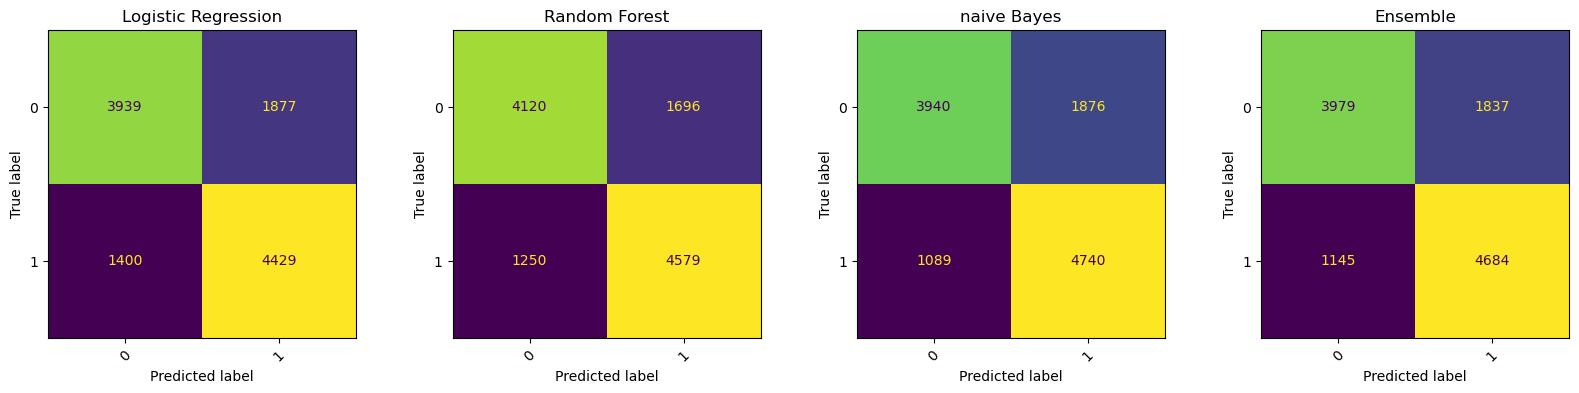

In [135]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay

clf_v1 = model_KNN
clf_v2 = model_LR_best
clf_v3 = model_svc

e_v_clf = VotingClassifier(
    estimators=[('lr', clf_v1), ('rf', clf_v2), ('gnb', clf_v3)],
    voting='hard')

# for clf, label in zip([clf_v1, clf_v2, clf_v3, e_v_clf], ['Logistic Regression', 'Random Forest', 
#                                                  'naive Bayes', 'Voiting']):
    # scores = cross_val_score(clf, X, y, scoring='accuracy', cv=ShuffleSplit(n_splits=5))
    # print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i,(clf, label) in enumerate(zip([clf_v1, clf_v2, clf_v3, e_v_clf], ['Logistic Regression', 
                                                               'Random Forest', 'naive Bayes', 'Ensemble'])):
    y_pred = clf.fit(X_train, y_train).predict(X_test) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=[0,1])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Training classifiers
clf_vs1 = DecisionTreeClassifier(max_depth=4)
clf_vs2 = KNeighborsClassifier(n_neighbors=7)
clf_vs3 = SVC(kernel='rbf', probability=True)
e_vs_clf = VotingClassifier(estimators=[('dt', clf_vs1), ('knn', clf_vs2), ('svc', clf_vs3)],
                        voting='soft', weights=[2, 1, 2])

for clf, label in zip([clf_vs1, clf_vs2, clf_vs3, e_vs_clf], ['DecisionTree', 
                                                    'KNeighbors', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i,(clf, label) in enumerate(zip([clf_vs1, clf_vs2, clf_vs3, e_vs_clf], ['DecisionTree', 
                                                               'KNeighbors', 'SVC', 'Ensemble'])):
    y_pred = clf.fit(X, y).predict(X) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y,y_pred), display_labels=iris.target_names)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()


clf_vs1 = clf_vs1.fit(X, y)
clf_vs2 = clf_vs2.fit(X, y)
clf_vs3 = clf_vs3.fit(X, y)
e_vs_clf = e_vs_clf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf_vs1, clf_vs2, clf_vs3, e_vs_clf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [139]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate

e_s_clf = StackingClassifier(
        estimators = [
            ('lr', clf_v1), 
            ('rf', clf_v2), 
            ('gnb', clf_v3)],
        final_estimator = LogisticRegression(max_iter=1500),
        stack_method = 'predict_proba'
)

e_s_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('preprocessing',
                                                 ColumnTransformer(force_int_remainder_cols=False,
                                                                   remainder='passthrough',
                                                                   transformers=[('num',
                                                                                  Pipeline(steps=[('missing_num',
                                                                                                   KNNImputer()),
                                                                                                  ('poly',
                                                                                                   PolynomialFeatures(include_bias=False,
                                                                                                                      interaction_only=True)),
                                                                                                  ('scaler',
                                                                                                   MinMaxScaler())]),
                                                                                  ['BMI',
                                                                                   'MentHlth',
                                                                                   'PhysHlth',
                                                                                   'Age',
                                                                                   'GenHlth...
                                                                                                   PolynomialFeatures(include_bias=False,
                                                                                                                      interaction_only=True))]),
                                                                                  ['HighBP',
                                                                                   'HighChol',
                                                                                   'CholCheck',
                                                                                   'Smoker',
                                                                                   'Stroke',
                                                                                   'HeartDiseaseorAttack',
                                                                                   'PhysActivity',
                                                                                   'Fruits',
                                                                                   'Veggies',
                                                                                   'HvyAlcoholConsump',
                                                                                   'AnyHealthcare',
                                                                                   'NoDocbcCost',
                                                                                   'DiffWalk',
                                                                                   'Sex'])])),
                                                ('classifier',
                                                 SVC(C=9, gamma=0.01,
                                                     probability=True))]))],
                   final_estimator=LogisticRegression(max_iter=1500),
                   stack_method='predict_proba')

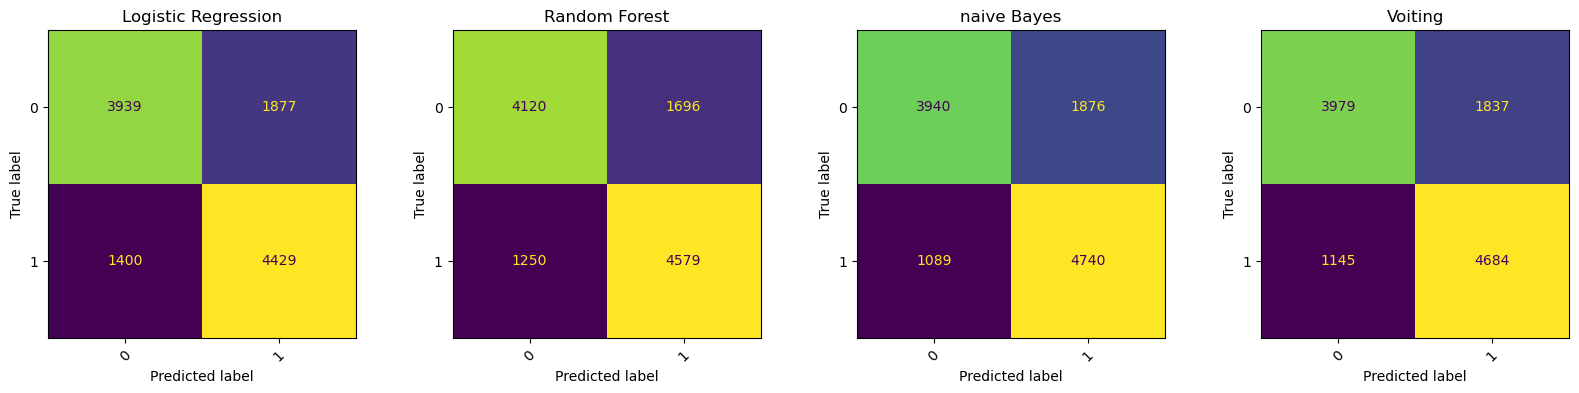

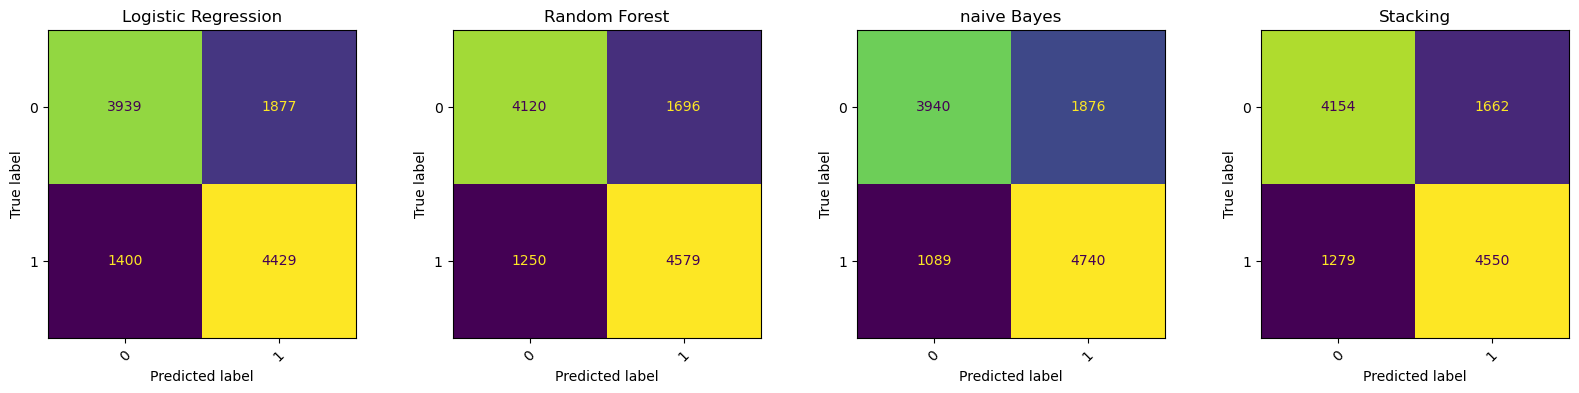

In [143]:
global_scores = []
names_est = ['DecisionTree', 'KNeighborsClassifier', 'SVC', 'Voiting','Stacking']


f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i,(clf, label) in enumerate(zip([clf_v1, clf_v2, clf_v3, e_v_clf], ['Logistic Regression', 
                                                               'Random Forest', 'naive Bayes', 'Voiting'])):
    y_pred = clf.fit(X_train, y_train).predict(X_test) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=[0,1])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()
    
f, axes = plt.subplots(1, 4, figsize=(20, 4))
for i,(clf, label) in enumerate(zip([clf_v1, clf_v2, clf_v3, e_s_clf], ['Logistic Regression', 
                                                               'Random Forest', 'naive Bayes', 'Stacking'])):
    y_pred = clf.fit(X_train, y_train).predict(X_test) 
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=[0,1])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(label)
    disp.im_.colorbar.remove()

In [149]:
thresholds = np.arange(0, 1.01, 0.01)  # Thresholds from 0 to 1 with a step of 0.01
results = []

for threshold in thresholds:
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)
    fbeta = fbeta_score(y_test, y_pred, beta=np.sqrt(2))
    results.append([threshold, fbeta])

#Convert results to a DataFrame for better viewing (optional but recommended)
results_df = pd.DataFrame(results, columns=['Threshold', 'Fbeta (beta=sqrt(2))'])
print(results_df)

# Find the best threshold based on your preferred metric
best_threshold_fbeta = results_df.loc[results_df['Fbeta (beta=sqrt(2))'].idxmax()] #example - best threshold based on fbeta score
print("Best threshold based on Fbeta(beta=sqrt(2)):", best_threshold_fbeta)

     Threshold  Fbeta (beta=sqrt(2))
0         0.00              0.750418
1         0.01              0.750418
2         0.02              0.750418
3         0.03              0.750418
4         0.04              0.750418
..         ...                   ...
96        0.96              0.000000
97        0.97              0.000000
98        0.98              0.000000
99        0.99              0.000000
100       1.00              0.000000

[101 rows x 2 columns]
Best threshold based on Fbeta(beta=sqrt(2)): Threshold               0.210000
Fbeta (beta=sqrt(2))    0.816313
Name: 21, dtype: float64


In [150]:
from sklearn.ensemble import RandomForestClassifier

best_forest1 = Pipeline(steps=[
  ('preproc', CT),
 # ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, criterion = 'gini', n_jobs = -1, min_samples_leaf = 17, max_features=21, oob_score = True))
])

# print(f"Метрика: {scoring['diabetes_gain'](best_forest1, X_test, y_test)}")
# y_pred = best_forest1.predict(X_test)

best_gbrt = GradientBoostingClassifier(learning_rate = 0.1, min_samples_split = 12, subsample = 0.9 ,n_estimators = 600)

In [151]:
clf_v1 = model_KNN
clf_v2 = model_LR_best
clf_v3 = model_svc
clf_v4 = best_forest1
clf_v5 = best_gbrt

In [152]:
e_s_clf = StackingClassifier(
        estimators = [
            ('rf', clf_v4), 
            ('svc', clf_v3), 
            ('gbrt', clf_v5)],
        final_estimator = LogisticRegression(max_iter=1500),
        stack_method = 'predict_proba'
)

e_s_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                Pipeline(steps=[('preproc',
                                                 ColumnTransformer(force_int_remainder_cols=False,
                                                                   remainder='passthrough',
                                                                   transformers=[('num',
                                                                                  Pipeline(steps=[('missing_num',
                                                                                                   KNNImputer()),
                                                                                                  ('poly',
                                                                                                   PolynomialFeatures(include_bias=False,
                                                                                                                      interaction_only=True)),
                                                                                                  ('scaler',
                                                                                                   MinMaxScaler())]),
                                                                                  ['BMI',
                                                                                   'MentHlth',
                                                                                   'PhysHlth',
                                                                                   'Age',
                                                                                   'GenHlth',
                                                                                   'Edu...
                                                                                   'HeartDiseaseorAttack',
                                                                                   'PhysActivity',
                                                                                   'Fruits',
                                                                                   'Veggies',
                                                                                   'HvyAlcoholConsump',
                                                                                   'AnyHealthcare',
                                                                                   'NoDocbcCost',
                                                                                   'DiffWalk',
                                                                                   'Sex'])])),
                                                ('classifier',
                                                 SVC(C=9, gamma=0.01,
                                                     probability=True))])),
                               ('gbrt',
                                GradientBoostingClassifier(min_samples_split=12,
                                                           n_estimators=600,
                                                           subsample=0.9))],
                   final_estimator=LogisticRegression(max_iter=1500),
                   stack_method='predict_proba')

In [153]:
y_pred = e_s_clf.predict(X_test)
thresholds = np.arange(0, 1.01, 0.01)  # Thresholds from 0 to 1 with a step of 0.01
results = []

for threshold in thresholds:
    y_pred_proba = e_s_clf.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= threshold).astype(int)
    fbeta = fbeta_score(y_test, y_pred, beta=np.sqrt(2))
    results.append([threshold, fbeta])

#Convert results to a DataFrame for better viewing (optional but recommended)
results_df = pd.DataFrame(results, columns=['Threshold', 'Fbeta (beta=sqrt(2))'])
print(results_df)

# Find the best threshold based on your preferred metric
best_threshold_fbeta = results_df.loc[results_df['Fbeta (beta=sqrt(2))'].idxmax()] #example - best threshold based on fbeta score
print("Best threshold based on Fbeta(beta=sqrt(2)):", best_threshold_fbeta)

     Threshold  Fbeta (beta=sqrt(2))
0         0.00              0.750418
1         0.01              0.750418
2         0.02              0.750418
3         0.03              0.750418
4         0.04              0.750418
..         ...                   ...
96        0.96              0.000000
97        0.97              0.000000
98        0.98              0.000000
99        0.99              0.000000
100       1.00              0.000000

[101 rows x 2 columns]
Best threshold based on Fbeta(beta=sqrt(2)): Threshold               0.270000
Fbeta (beta=sqrt(2))    0.816445
Name: 27, dtype: float64


In [ ]:
cv_results_model_LR = pd.DataFrame(
    cross_validate(
        e_s_clf,
        X_train,
        y_train,
        scoring=scorer,
        cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10),
        return_train_score=True,
        return_estimator=True,
    )
)

model_tuned = TunedThresholdClassifierCV(estimator = model_LR_best, scoring=scorer)

cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_tuned,
        X_train,
        y_train,
        scoring=scorer,
        cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10),
        return_train_score=True,
        return_estimator=True,
    )
)
decision_threshold = pd.Series([est.best_threshold_ for est in cv_results_model_tuned["estimator"]])#


print('median: ', decision_threshold.median())
print('mean: ', decision_threshold.mean())